# Kaggle's Titanic Competition: Machine Learning from Disaster

#### importing libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading Dataset

In [14]:
train = pd.read_csv('train.csv')
train.head(n = 20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


##### shape of train dataset

In [15]:
train.shape

(891, 12)

##  EDA

#### Checking the missing values

In [16]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Here above the result we can see that in '__Age__' column there are __177__ missing values, '__cabin__' column have __687__ missing values
and '__Embarked__' have __2__ missing values.

#### checking missing values using heat map

- We can create simple heatmap & visualize that how many missing value in our dataset.

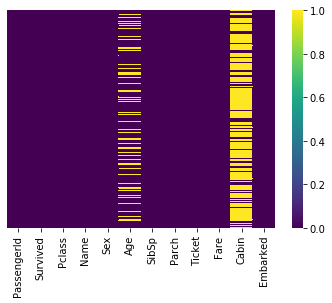

In [17]:
sns.heatmap(train.isnull(),  yticklabels = False, cmap = 'viridis')

- Here in above heatmap yellow values are the nan or missing values in '__Age__' & '__Cabin__' column.
- Cabin have more missing values.
- Age have some missing values.

#### balanced or imbalaced?

Text(0.5, 1.0, 'balanced or imbalaced?')

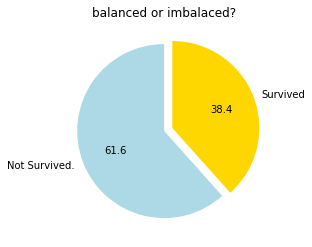

In [18]:
x = train['Survived'].value_counts()
label = ['Not Survived.', 'Survived']
fig, axarr = plt.subplots()
plt.pie(x, startangle = 90, explode = [0, 0.1], labels = label, colors = ['lightblue', 'gold'], autopct = '%0.01f')    
axarr.set_title('balanced or imbalaced?')

#### Survived vs Sex Column

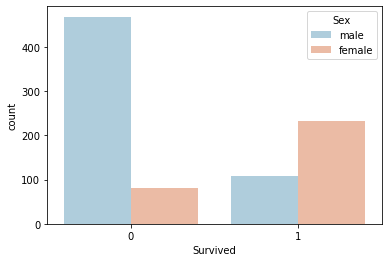

In [19]:
sns.countplot(x = 'Survived',hue = 'Sex', data = train, palette  = 'RdBu_r')

#### Survived vs Pclass Column

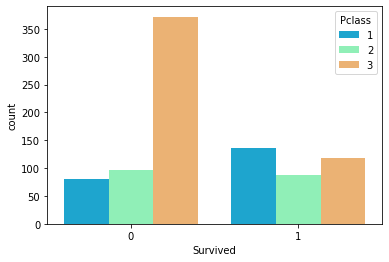

In [20]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = train, palette = 'rainbow')

##### distribution of Age

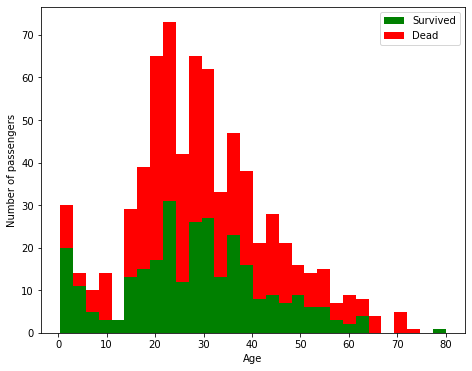

In [21]:
figure = plt.figure(figsize=(7.6,6))
plt.hist([train[train['Survived']==1]['Age'], train[train['Survived']==0]['Age']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

#### Survived vs Sibsp Column

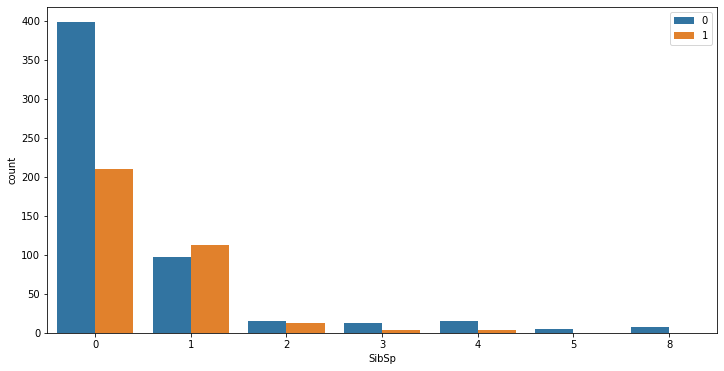

In [22]:
plt.figure(figsize = (12,6))
sns.countplot(x = "SibSp", data = train, hue= 'Survived')
plt.legend(loc = 'upper right')

- 0  maximun no.  of people didn't  have any  sibling or spouse.
- 1 sibling or spouse
- 2 sibling or spouse.
- 3 sibling or spouse
- similary 4, 5, 6 sibling or spouse.

####  Survived vs Parch(parent/child)

- how many Number of Parents/Children Survived or not

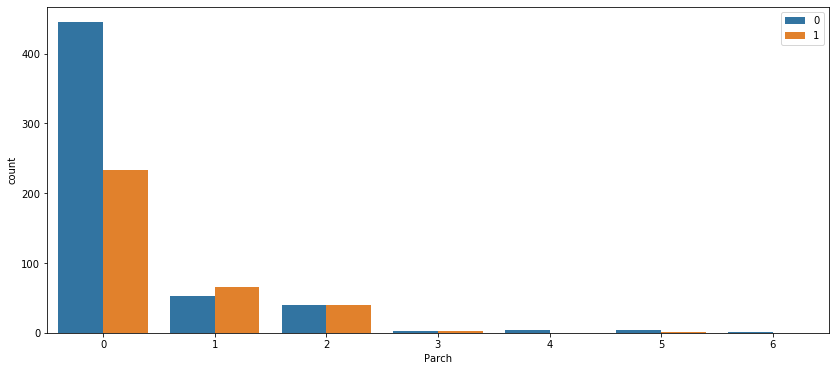

In [23]:
plt.figure(figsize = (14,6))
sns.countplot(x = 'Parch', data = train, hue = 'Survived')
plt.legend(loc = 'upper right')

#### Distirbution of Fare

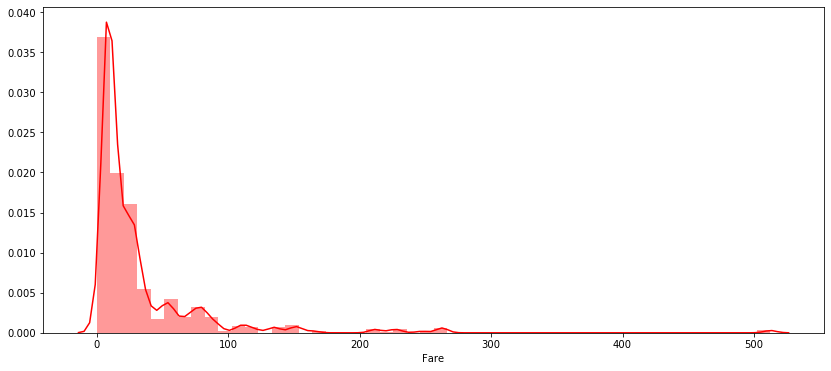

In [24]:
plt.figure(figsize = (14,6))
sns.distplot(train['Fare'], color = 'red')

## Data preparing

#### Handling the missing values on train dataframe

In [25]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
X = train.drop(["Survived", 'PassengerId', 'Name', 'Ticket','Cabin',  'Embarked'], axis = 1)
y = train.iloc[:,1].values

In [27]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000
887,1,female,19.0,0,0,30.0000
888,3,female,NaN,1,2,23.4500
889,1,male,26.0,0,0,30.0000


In [28]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [29]:
X = X.values # converting dataframe into numpy array cause imputer don't support Panda DataFrame

#### Handling the missing values on train set

In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
X[:,2:3] = imputer.fit_transform(X[:,2:3])
print(X)

[[3 'male' 22.0 1 0 7.25]
 [1 'female' 38.0 1 0 71.2833]
 [3 'female' 26.0 0 0 7.925]
 ...
 [3 'female' 29.69911764705882 1 2 23.45]
 [1 'male' 26.0 0 0 30.0]
 [3 'male' 32.0 0 0 7.75]]


#### handling the categorical data on train  dataset

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,1] = le.fit_transform(X[:,1])


In [32]:
print(X)

[[3 1 22.0 1 0 7.25]
 [1 0 38.0 1 0 71.2833]
 [3 0 26.0 0 0 7.925]
 ...
 [3 0 29.69911764705882 1 2 23.45]
 [1 1 26.0 0 0 30.0]
 [3 1 32.0 0 0 7.75]]


#### splitting  train.csv  into train and test set

In [33]:

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 0)

#### faeture scaling  on train.csv dataset

In [34]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Modeling

### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# predict the test set
y_pred = lr.predict(X_test)

#  Evaluate the performance
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(accuracy_score(y_test, y_pred))

[[94 16]
 [21 48]]
0.7932960893854749


In [36]:
from sklearn.model_selection import cross_val_score
crs = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 10)
print('accuracy cross_val_score: {}'.format(crs.mean()))
print('train accuracy: {}'.format(lr.score(X_train,y_train)))

accuracy cross_val_score: 0.7950117370892019
train accuracy: 0.8019662921348315


### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
dt.fit(X_train,y_train)

# predict the test set
y_pred = dt.predict(X_test)

#  Evaluate the performance
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(accuracy_score(y_test, y_pred))

[[95 15]
 [23 46]]
0.7877094972067039


In [38]:
from sklearn.model_selection import cross_val_score
crs = cross_val_score(estimator = dt, X = X_train, y = y_train, cv = 5)
print('accuracy cross_val_score: {}'.format(crs.mean()))
print('train accuracy: {}'.format(lr.score(X_train,y_train)))

accuracy cross_val_score: 0.7640795823894415
train accuracy: 0.8019662921348315


### RandomForest

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


rf.fit(X_train,y_train)

# predict the test set
y_pred = rf.predict(X_test)

 # Evaluate the performance
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(accuracy_score(y_test, y_pred))

[[101   9]
 [ 21  48]]
0.8324022346368715


In [40]:
from sklearn.model_selection import cross_val_score
crs = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 5)
print('accuracy cross_val_score: {}'.format(crs.mean()))
print('train accuracy: {}'.format(lr.score(X_train,y_train)))

accuracy cross_val_score: 0.8075741160248203
train accuracy: 0.8019662921348315


## knn

In [41]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    score = knn.predict(X_test)
    error_rate.append(1-score.mean())

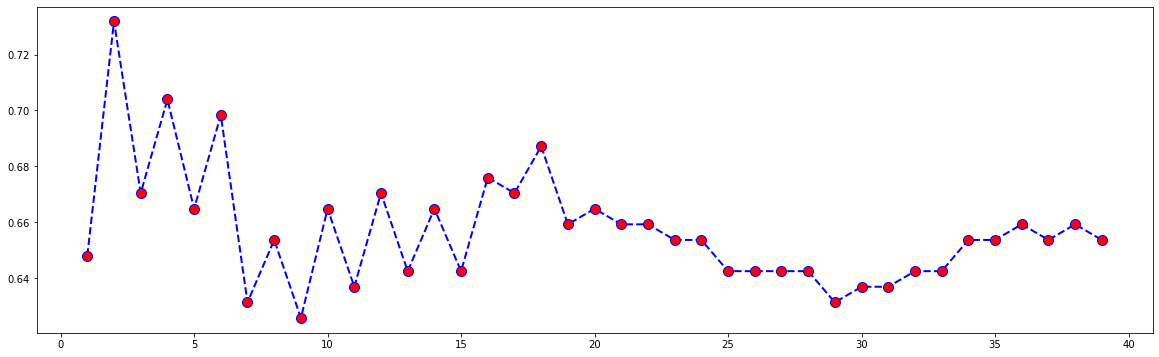

In [42]:
plt.figure(figsize = (20,6))
plt.plot(range(1,40), error_rate, color = 'blue', marker = 'o', linestyle = 'dashed',markerfacecolor = 'red', linewidth  =2, markersize = 10)

In [43]:
knn = KNeighborsClassifier(n_neighbors = 7,metric='minkowski', p =2)
knn.fit(X_train, y_train)

# predict the test set
y_pred = knn.predict(X_test)

#  Evaluate the performance
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(accuracy_score(y_test, y_pred))

[[93 17]
 [20 49]]
0.7932960893854749


In [44]:
from sklearn.model_selection import cross_val_score
crs = cross_val_score(estimator = dt, X = X_train, y = y_train, cv = 5)
print('accuracy cross_val_score: {}'.format(crs.mean()))
print('train accuracy: {}'.format(lr.score(X_train,y_train)))

accuracy cross_val_score: 0.7640795823894415
train accuracy: 0.8019662921348315


### Svm 

#### Applying grid search to find  out the best parameters for svm

In [45]:
from sklearn.svm import SVC
classifier = SVC()
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 83.30 %
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


#### Applynig SVM dataset

In [46]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', C = 1, gamma= 0.1)
svc.fit(X_train,y_train)

# predict the test set
y_pred = svc.predict(X_test)

# Evaluate the performance
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(accuracy_score(y_test, y_pred))

[[96 14]
 [20 49]]
0.8100558659217877


In [47]:
from sklearn.model_selection import cross_val_score
crs = cross_val_score(estimator = svc, X = X_train, y = y_train, cv = 5)
print('accuracy cross_val_score: {}'.format(crs.mean()))
print('train accuracy: {}'.format(lr.score(X_train,y_train)))

accuracy cross_val_score: 0.8272431793558553
train accuracy: 0.8019662921348315


## Applying best model  on test.csv dataset

In [48]:
testdf  = pd.read_csv('test.csv')

In [49]:
testdf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### dropping the unnecessary column for test dataframe

In [50]:
X1  = testdf.drop(['PassengerId', 'Name','Ticket','Cabin', 'Embarked'],axis = 1)

In [51]:
X1.isnull().sum()

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Fare       1
dtype: int64

- Here in fare Column we have 1 missing values 
- And Age Column have 86 missing values

In [52]:
X1

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500
414,1,female,39.0,0,0,108.9000
415,3,male,38.5,0,0,7.2500
416,3,male,NaN,0,0,8.0500


In [53]:
X1 = X1.values # converting dataframe into numpy array cause imputer don't support Panda DataFrame.

#### Handling the missing values  on test.csv set

In [54]:
imputer  = SimpleImputer()
X1[:,2:3]  = imputer.fit_transform(X1[:,2:3])

X1[:,5:6] = imputer.fit_transform(X1[:,5:6])

In [55]:
X1

array([[3, 'male', 34.5, 0, 0, 7.8292],
       [3, 'female', 47.0, 1, 0, 7.0],
       [2, 'male', 62.0, 0, 0, 9.6875],
       ...,
       [3, 'male', 38.5, 0, 0, 7.25],
       [3, 'male', 30.272590361445783, 0, 0, 8.05],
       [3, 'male', 30.272590361445783, 1, 1, 22.3583]], dtype=object)

#### Handling the categorical values on test.csv

In [56]:
X1[:,1] = le.fit_transform(X1[:,1])


In [57]:
X1

array([[3, 1, 34.5, 0, 0, 7.8292],
       [3, 0, 47.0, 1, 0, 7.0],
       [2, 1, 62.0, 0, 0, 9.6875],
       ...,
       [3, 1, 38.5, 0, 0, 7.25],
       [3, 1, 30.272590361445783, 0, 0, 8.05],
       [3, 1, 30.272590361445783, 1, 1, 22.3583]], dtype=object)

In [58]:
pd.DataFrame(X1).isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

#### Feature Scaling on test.csv

In [59]:
X1  = sc.fit_transform(X1)

In [60]:
X1

array([[ 0.87348191,  0.75592895,  0.3349926 , -0.49947002, -0.4002477 ,
        -0.49840706],
       [ 0.87348191, -1.32287566,  1.32553003,  0.61699237, -0.4002477 ,
        -0.51327429],
       [-0.31581919,  0.75592895,  2.51417495, -0.49947002, -0.4002477 ,
        -0.46508846],
       ...,
       [ 0.87348191,  0.75592895,  0.65196458, -0.49947002, -0.4002477 ,
        -0.50879189],
       [ 0.87348191,  0.75592895,  0.        , -0.49947002, -0.4002477 ,
        -0.4944482 ],
       [ 0.87348191,  0.75592895,  0.        ,  0.61699237,  0.61989583,
        -0.23790598]])

#### Applying support vector machine on test.csv and predicting the dataset

In [61]:
predicted_survived = svc.predict(X1)

##### predicted values

In [62]:
predicted_survived

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

- Great! now we can submit this result to the kaggle __Submit Predictions__.

### Saving dataset 

In [63]:
submission = pd.DataFrame({
    'PassengerId': testdf['PassengerId'],
    'Survived': predicted_survived
})

In [64]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [65]:
submission.to_csv('titanic_submission.csv',index = False)

- Now this save csv file we can submit to kaggle __Submit Predictions__. and we can check  our performance and ranking.